In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings('ignore')

In [2]:
#loads CardioGoodFitness dataset and displays 10 sampled rows
dataset = pd.read_csv('CardioGoodFitness.csv')
dataset.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
#check dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
#check distribution of numerical data
dataset.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
#create counts of data for plotting categorical variables
products = np.unique(dataset['Product'], return_counts=True)
gender = np.unique(dataset['Gender'], return_counts=True)
marital_stat = np.unique(dataset['MaritalStatus'], return_counts=True)
print('products = {}\n'.format(products))
print('gender = {}\n'.format(gender))
print('marital_stat = {}\n'.format(marital_stat))

products = (array(['TM195', 'TM498', 'TM798'], dtype=object), array([80, 60, 40], dtype=int64))

gender = (array(['Female', 'Male'], dtype=object), array([ 76, 104], dtype=int64))

marital_stat = (array(['Partnered', 'Single'], dtype=object), array([107,  73], dtype=int64))



<Axes: xlabel='Age', ylabel='Density'>

Text(58, 0.04, 'skewness: 0.982')

Text(0.5, 1.0, 'Age')

Text(0.5, 0, 'Age [yrs]')

Text(0, 0.5, 'Probability per Unit')

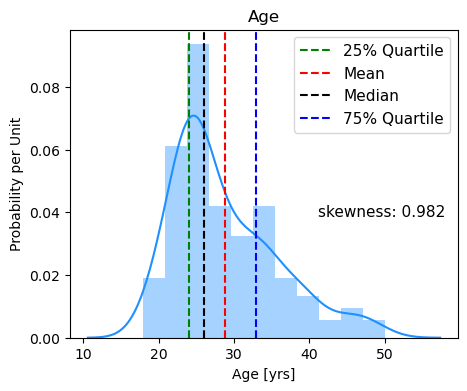

In [63]:


fig, ax1 = plt.subplots(figsize=[5, 4])
sns.distplot(dataset['Age'], ax=ax1, color='dodgerblue')
ax1.axvline(dataset['Age'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax1.axvline(dataset['Age'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(dataset['Age'].median(), color='black', linestyle='--', label='Median')
ax1.axvline(dataset['Age'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
ax1.text(58, 0.04, 'skewness: {}' .format(str(round(dataset['Age'].skew(), 3))), ha='right', va='center', size=11)
ax1.set_title('Age')
ax1.set_xlabel('Age [yrs]')
ax1.set_ylabel('Probability per Unit')
ax1.legend(fontsize=11)
plt.show()


<Axes: >

Text(0.2, 62, '42.2%')

Text(1.2, 90, '57.8%')

Text(0.5, 1.0, 'Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

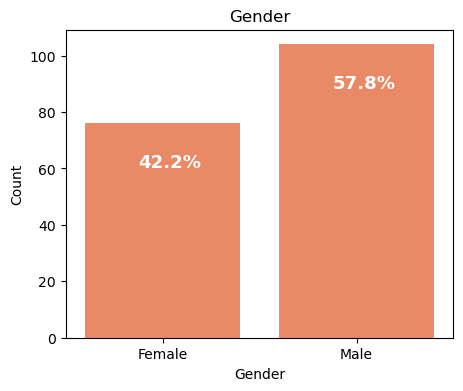

In [57]:
fig, ax2 = plt.subplots(figsize=[5, 4])
sns.barplot(x=list(gender[0]), y=list(gender[1]), ax=ax2, color='coral')
ax2.text(0.2, 62, '{}%' .format(str(round(gender[1][0]/sum(gender[1])*100, 1))), ha='right', va='center', size=13, color = 'white', fontweight='bold')
ax2.text(1.2, 90, '{}%' .format(str(round(gender[1][1]/sum(gender[1])*100, 1))), ha='right', va='center', size=13, color = 'white', fontweight='bold')
ax2.set_title('Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
plt.show()


<Axes: xlabel='Education'>

Text(0.5, 1.0, 'Education (in years)')

Text(0.5, 0, 'Years of Education')

Text(0, 0.5, 'Count')

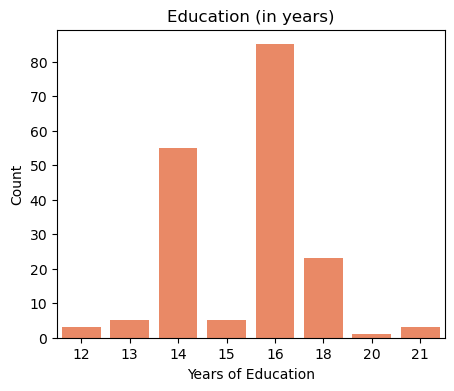

In [58]:
fig, ax3 = plt.subplots(figsize=[5, 4])
education_counts = dataset['Education'].value_counts().sort_index()
sns.barplot(x=education_counts.index, y=education_counts.values, ax=ax3, color='coral')
ax3.set_title('Education (in years)')
ax3.set_xlabel('Years of Education')
ax3.set_ylabel('Count')
plt.show()


<Axes: >

Text(0.2, 92, '59.4%')

Text(1.2, 58, '40.6%')

Text(0.5, 1.0, 'Marital Status')

Text(0.5, 0, 'Integer Categorical')

Text(0, 0.5, 'Count')

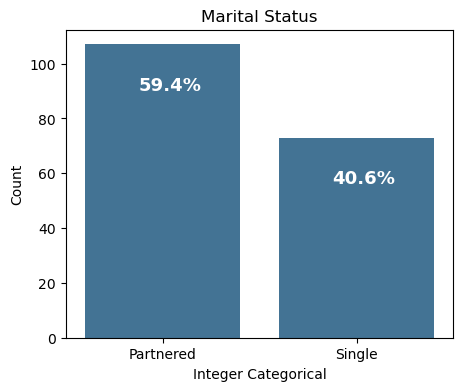

In [60]:
fig, ax4 = plt.subplots(figsize=[5, 4])
sns.barplot(x=list(marital_stat[0]), y=list(marital_stat[1]), ax=ax4, color='#3675A1')
ax4.text(0.2, 92, '{}%' .format(str(round(marital_stat[1][0]/sum(marital_stat[1])*100, 1))), ha='right', va='center', size=13, color = 'white', fontweight='bold')
ax4.text(1.2, 58, '{}%' .format(str(round(marital_stat[1][1]/sum(marital_stat[1])*100, 1))), ha='right', va='center', size=13, color = 'white', fontweight='bold')
ax4.set_title('Marital Status')
ax4.set_xlabel('Integer Categorical')
ax4.set_ylabel('Count')
plt.show()


<Axes: xlabel='Usage'>

Text(0.5, 1.0, 'Expected Usage (freq.)')

Text(0.5, 0, 'Integer Categorical')

Text(0, 0.5, 'Count')

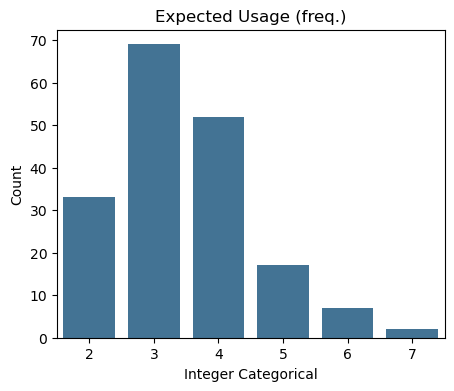

In [61]:
fig, ax5 = plt.subplots(figsize=[5, 4])
usage_counts = dataset['Usage'].value_counts().sort_index()
sns.barplot(x=usage_counts.index, y=usage_counts.values, ax=ax5, color='#3675A1')
ax5.set_title('Expected Usage (freq.)')
ax5.set_xlabel('Integer Categorical')
ax5.set_ylabel('Count')
plt.show()

<Axes: xlabel='Fitness'>

Text(0.5, 1.0, 'Fitness (Self-rated)')

Text(0.5, 0, 'Integer Categorical')

Text(0, 0.5, 'Count')

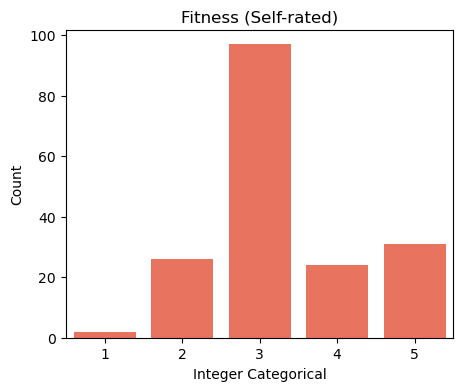

In [12]:
fig, ax6 = plt.subplots(figsize=[5, 4])
fit_counts = dataset['Fitness'].value_counts().sort_index()
sns.barplot(x=fit_counts.index, y=fit_counts.values, ax=ax6, color='tomato')
ax6.set_title('Fitness (Self-rated)')
ax6.set_xlabel('Integer Categorical')
ax6.set_ylabel('Count')
plt.show()

<Axes: xlabel='Income', ylabel='Density'>

Text(118000, 1.8e-05, 'skewness: 1.292')

Text(0.5, 1.0, 'Income')

Text(0.5, 0, 'Annual Income [$USD]')

Text(0, 0.5, 'Probability per Unit')

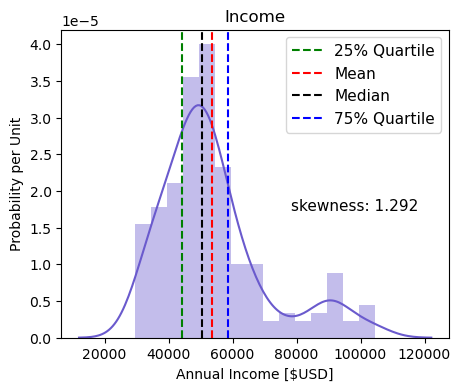

In [13]:
fig, ax7 = plt.subplots(figsize=[5, 4])
sns.distplot(dataset['Income'], ax=ax7, color='slateblue')
ax7.axvline(dataset['Income'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax7.axvline(dataset['Income'].mean(), color='red', linestyle='--', label='Mean')
ax7.axvline(dataset['Income'].median(), color='black', linestyle='--', label='Median')
ax7.axvline(dataset['Income'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
ax7.text(118000, 1.8e-5, 'skewness: {}' .format(str(round(dataset['Income'].skew(), 3))), ha='right', va='center', size=11)
ax7.set_title('Income')
ax7.set_xlabel('Annual Income [$USD]')
ax7.set_ylabel('Probability per Unit')
ax7.legend(fontsize=11)
plt.show()


In [18]:
#create dummies of categorical features so that correlation may be analyzed
dum_dataset= pd.get_dummies(dataset, prefix='Prod', columns=['Product'])
dum_dataset= pd.get_dummies(dum_dataset, prefix='Mar', columns=['MaritalStatus'])
dum_dataset= pd.get_dummies(dum_dataset, prefix='Gen', columns=['Gender'])
dum_dataset.head(10)

,Age,Education,Usage,Fitness,Income,Miles,Prod_TM195,Prod_TM498,Prod_TM798,Mar_Partnered,Mar_Single,Gen_Female,Gen_Male
0,18,14,3,4,29562,112,True,False,False,False,True,False,True
1,19,15,2,3,31836,75,True,False,False,False,True,False,True
2,19,14,4,3,30699,66,True,False,False,True,False,True,False
3,19,12,3,3,32973,85,True,False,False,False,True,False,True
4,20,13,4,2,35247,47,True,False,False,True,False,False,True
5,20,14,3,3,32973,66,True,False,False,True,False,True,False
6,21,14,3,3,35247,75,True,False,False,True,False,True,False
7,21,13,3,3,32973,85,True,False,False,False,True,False,True
8,21,15,5,4,35247,141,True,False,False,False,True,False,True
9,21,15,2,3,37521,85,True,False,False,True,False,True,False


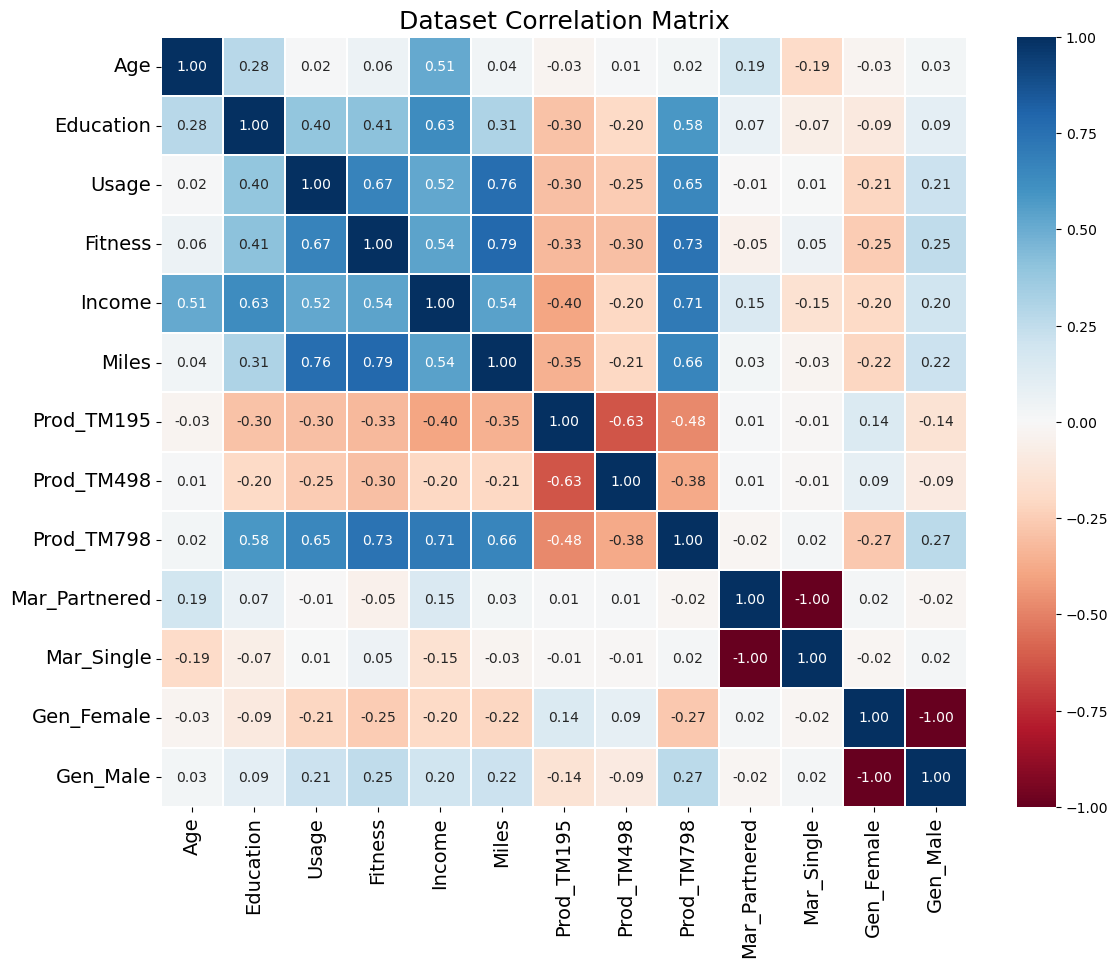

In [24]:
#create dummies of categorical features so that correlation may be analyzed
dum_dataset= pd.get_dummies(dataset, prefix='Prod', columns=['Product'])
dum_dataset= pd.get_dummies(dum_dataset, prefix='Mar', columns=['MaritalStatus'])
dum_dataset= pd.get_dummies(dum_dataset, prefix='Gen', columns=['Gender'])

#plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,10])
sns.heatmap(dum_dataset.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap="RdBu")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict={'color':'black', 'size': 18})
fig.show();

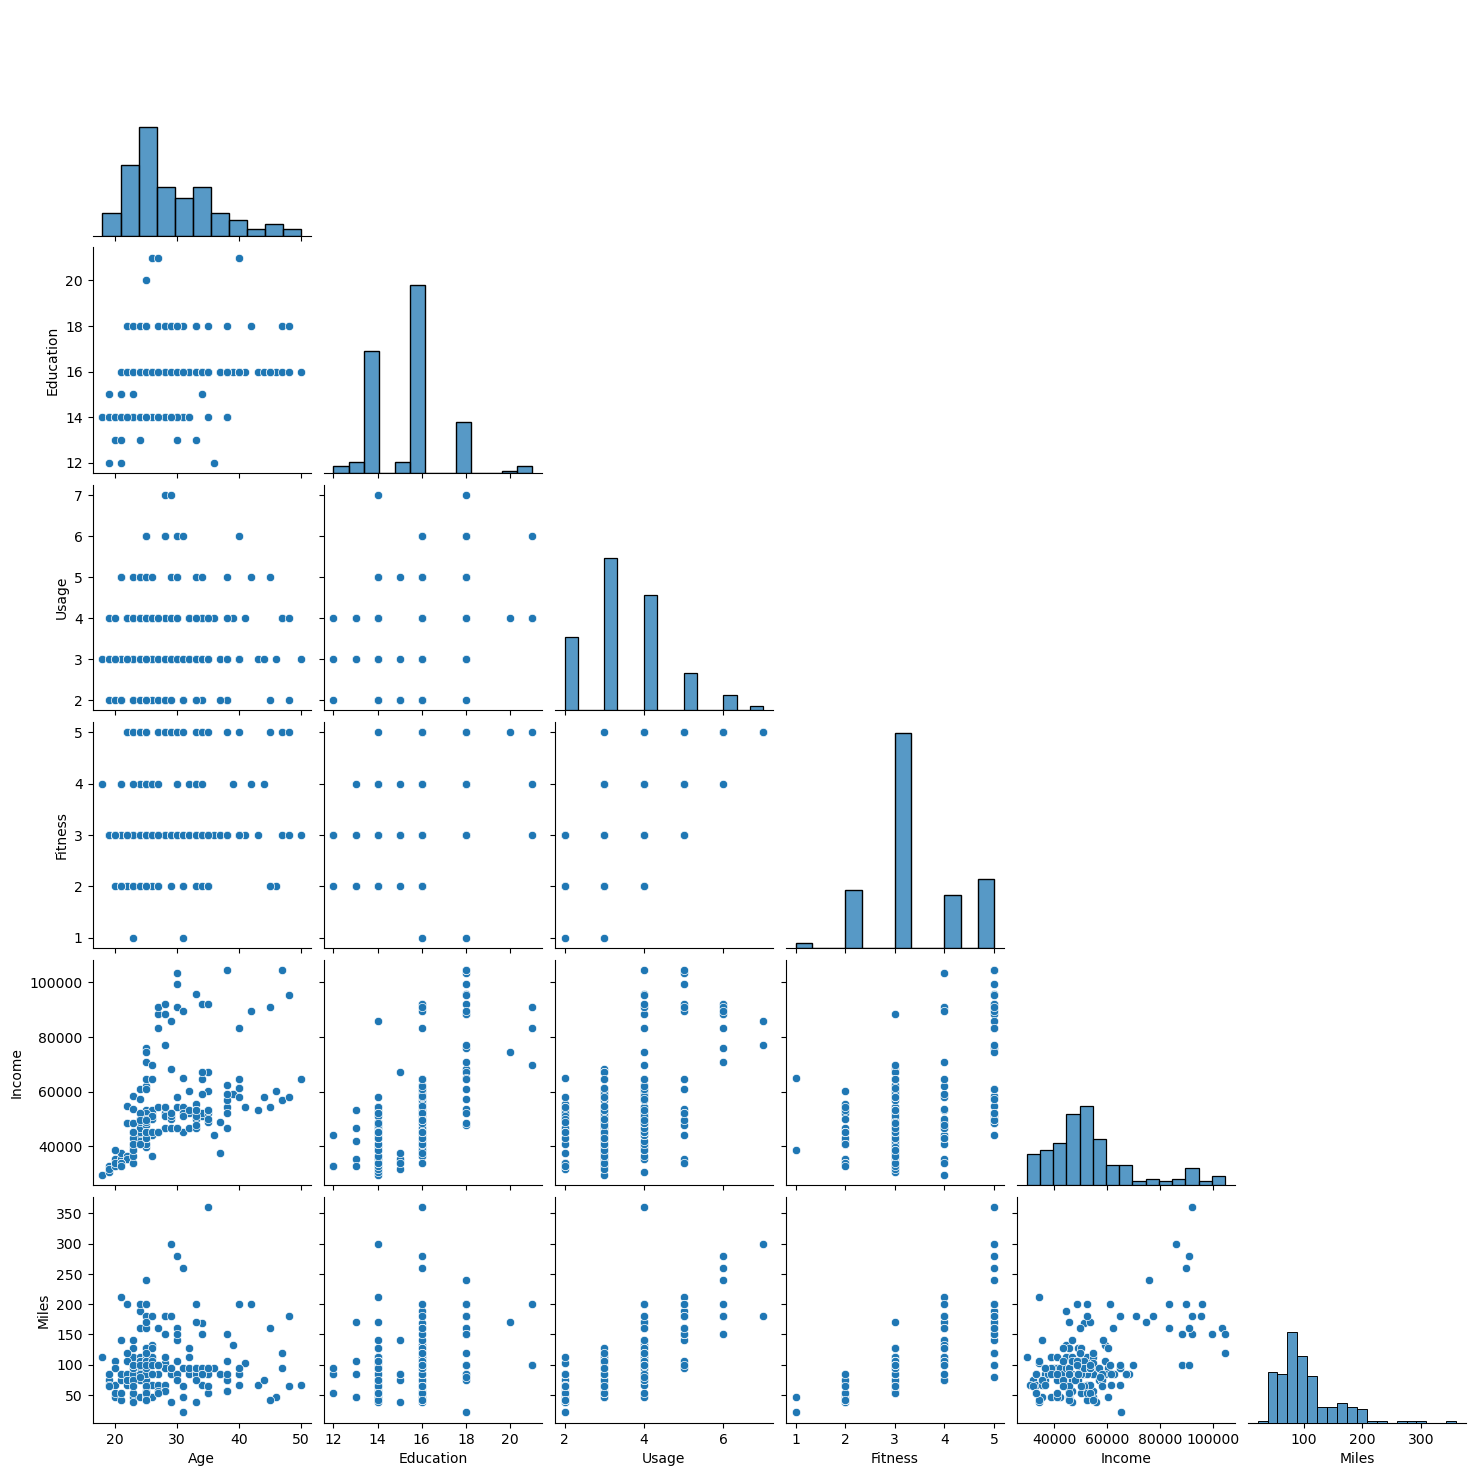

In [26]:
sns.pairplot(dataset, corner=True);

Text(0.5, 0.98, 'Income vs. Usage')

<Axes: xlabel='Usage', ylabel='Income'>

Text(0.5, 0, 'Expected Usage')

Text(0, 0.5, 'Annual Income [USD]')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7')])

(array([ 40000.,  50000.,  60000.,  70000.,  80000.,  90000., 100000.]),
 [Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000'),
  Text(0, 80000.0, '80000'),
  Text(0, 90000.0, '90000'),
  Text(0, 100000.0, '100000')])

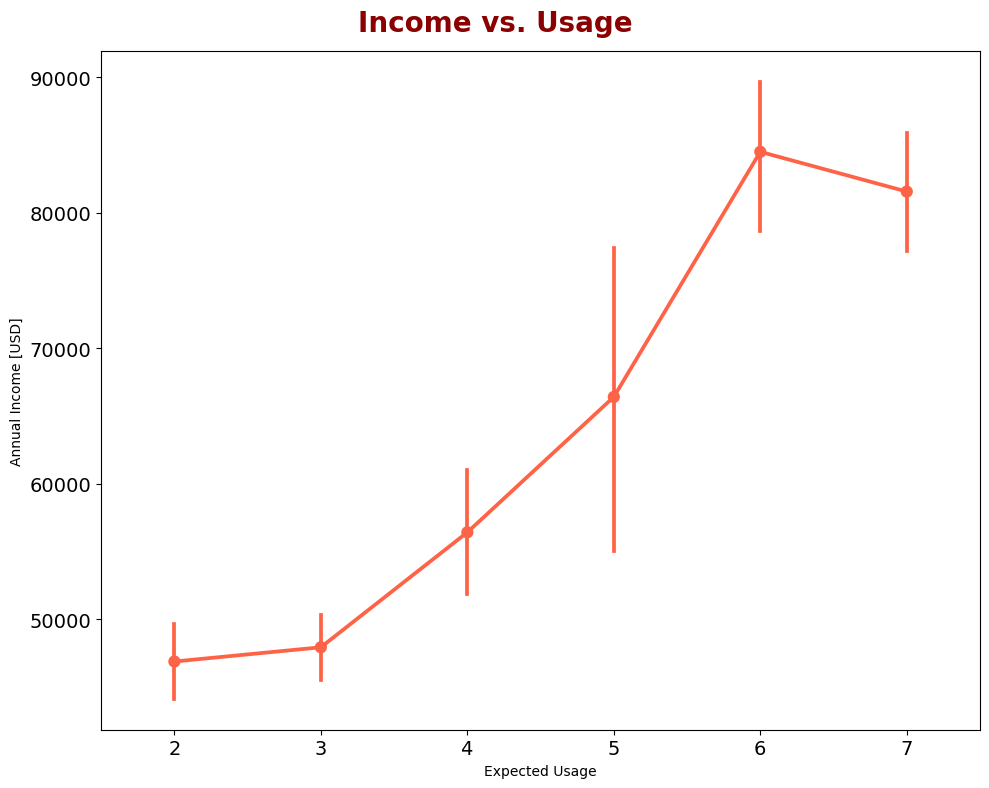

In [36]:
# Create figure with 1 subplot
fig = plt.figure(figsize=[10, 8])
fig.suptitle("Income vs. Usage", fontsize=20, fontweight='bold', color='darkred')

ax3 = fig.add_subplot(1, 1, 1)
sns.pointplot(data=dataset, x='Usage', y='Income', ax=ax3, color='tomato')
ax3.set_xlabel('Expected Usage')
ax3.set_ylabel('Annual Income [USD]')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig.tight_layout()
plt.show()


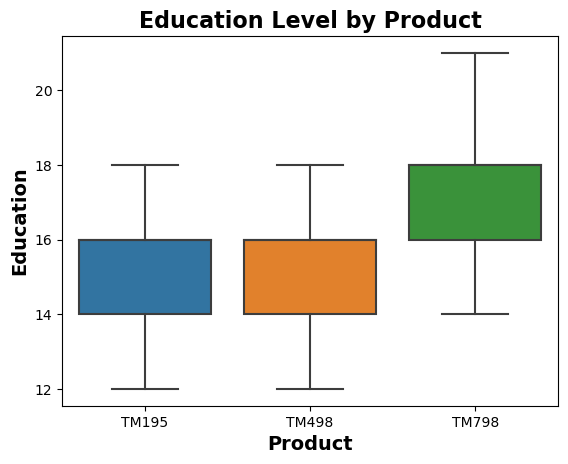

In [37]:
#create boxplot of education by product
fig = plt.figure();
sns.boxplot(data=dataset, x='Product', y='Education');
plt.xlabel('Product', fontsize=14, fontweight='bold');
plt.ylabel('Education', fontsize=14, fontweight='bold');
plt.title('Education Level by Product', fontsize=16, fontweight='bold');

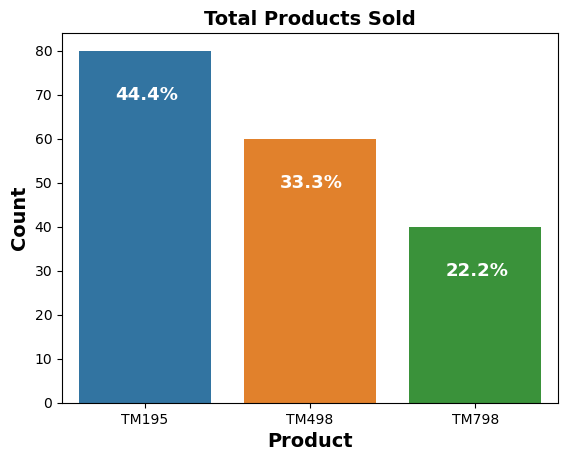

In [48]:
#create barplot of total products sold
fig = plt.figure();
sns.barplot(x=list(products[0]), y=list(products[1]));
plt.text(0.2, 70, '{}%' .format(str(round(products[1][0]/sum(products[1])*100,1))), ha='right', va='center', size=13, color= 'white', fontdict={'weight': 'bold'})
plt.text(1.2, 50, '{}%' .format(str(round(products[1][1]/sum(products[1])*100,1))), ha='right', va='center', size=13, color= 'white', fontdict={'weight': 'bold'})
plt.text(2.2, 30, '{}%' .format(str(round(products[1][2]/sum(products[1])*100,1))), ha='right', va='center', size=13, color= 'white', fontdict={'weight': 'bold'})
plt.xlabel('Product', fontsize=14, fontweight='bold');
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.title('Total Products Sold', fontsize=14, fontweight='bold');

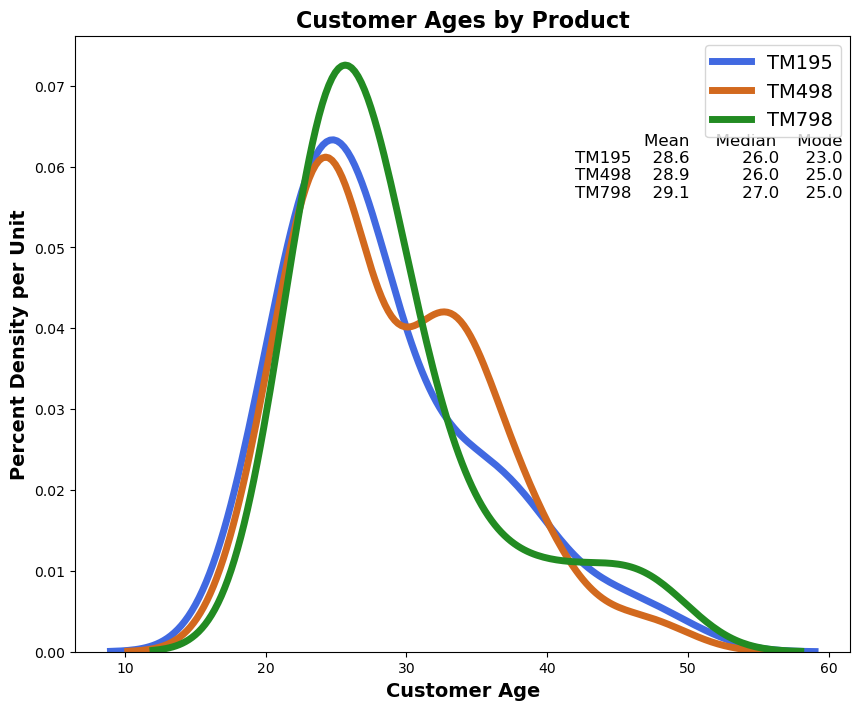

In [50]:
#create probability density plot of customer annual income by product
plt.figure(figsize=[10,8]);

sns.distplot(dataset['Age'].where(dataset['Product']=='TM195'), hist=None, label='TM195', kde_kws=dict(linewidth=5, color='royalblue'));
sns.distplot(dataset['Age'].where(dataset['Product']=='TM498'), hist=None, label='TM498', kde_kws=dict(linewidth=5, color='chocolate'));
sns.distplot(dataset['Age'].where(dataset['Product']=='TM798'), hist=None, label='TM798', kde_kws=dict(linewidth=5, color='forestgreen'));
#annotate with mean, median, and mode
plt.text(61, 0.06, '            Mean     Median    Mode\nTM195    {}          {}     {}\nTM498    {}          {}     {}\nTM798    {}          {}     {}'.format(round(dataset['Age'].where(dataset['Product']=='TM195').mean(),1),dataset['Age'].where(dataset['Product']=='TM195').median(),dataset['Age'].where(dataset['Product']=='TM195').mode()[0],round(dataset['Age'].where(dataset['Product']=='TM498').mean(),1),dataset['Age'].where(dataset['Product']=='TM498').median(),dataset['Age'].where(dataset['Product']=='TM498').mode()[0],round(dataset['Age'].where(dataset['Product']=='TM798').mean(),1),dataset['Age'].where(dataset['Product']=='TM798').median(),dataset['Age'].where(dataset['Product']=='TM798').mode()[0]), ha='right', va='center', size=12)

plt.legend(fontsize=14, );

plt.title('Customer Ages by Product', fontsize=16, fontweight='bold');
plt.xlabel('Customer Age', fontsize=14, fontweight='bold');
plt.ylabel('Percent Density per Unit', fontsize=14, fontweight='bold');

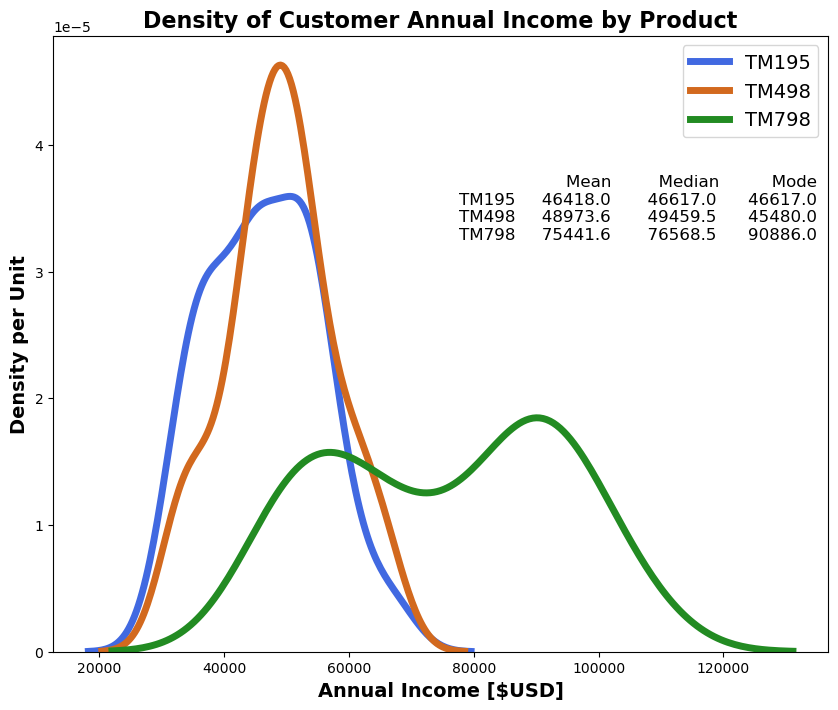

In [53]:
plt.figure(figsize=[10,8]);

sns.distplot(dataset['Income'].where(dataset['Product']=='TM195'), hist=None, label='TM195', kde_kws=dict(linewidth=5, color='royalblue'));
sns.distplot(dataset['Income'].where(dataset['Product']=='TM498'), hist=None, label='TM498', kde_kws=dict(linewidth=5, color='chocolate'));
sns.distplot(dataset['Income'].where(dataset['Product']=='TM798'), hist=None, label='TM798', kde_kws=dict(linewidth=5, color='forestgreen'));
#annotate with mean, median, and mode
plt.text(135000, 3.5e-5, '            Mean         Median          Mode\nTM195     {}       {}      {}\nTM498     {}       {}      {}\nTM798     {}       {}      {}'.format(round(dataset['Income'].where(dataset['Product']=='TM195').mean(),1),dataset['Income'].where(dataset['Product']=='TM195').median(),dataset['Income'].where(dataset['Product']=='TM195').mode()[0],round(dataset['Income'].where(dataset['Product']=='TM498').mean(),1),dataset['Income'].where(dataset['Product']=='TM498').median(),dataset['Income'].where(dataset['Product']=='TM498').mode()[0],round(dataset['Income'].where(dataset['Product']=='TM798').mean(),1),dataset['Income'].where(dataset['Product']=='TM798').median(),dataset['Income'].where(dataset['Product']=='TM798').mode()[0]), ha='right', va='center', size=12)

plt.legend(fontsize=14);

plt.title('Density of Customer Annual Income by Product', fontsize=16, fontweight='bold');
plt.xlabel('Annual Income [$USD]', fontsize=14, fontweight='bold');
plt.ylabel('Density per Unit', fontsize=14, fontweight='bold');

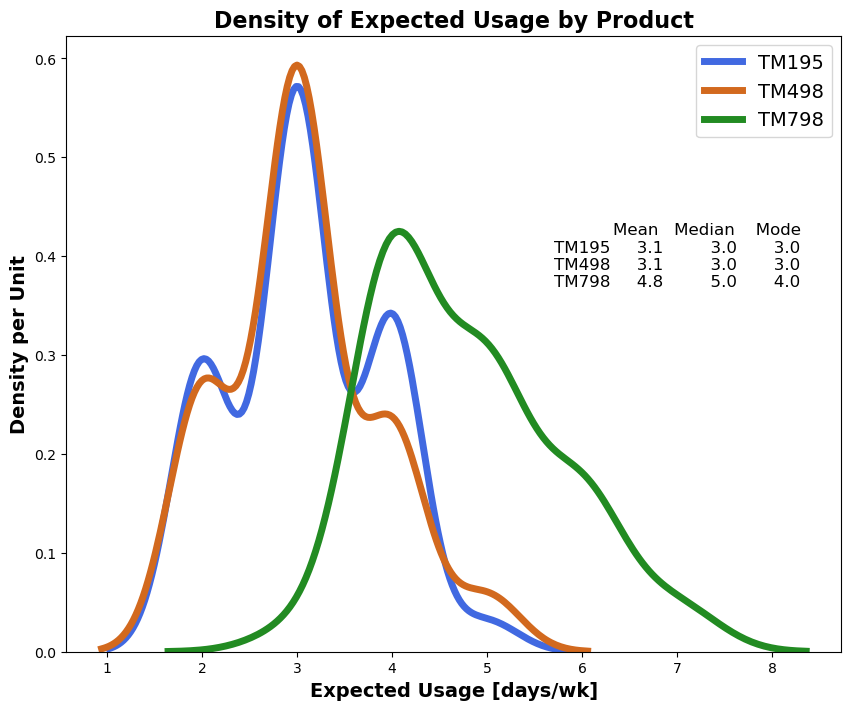

In [51]:
#create probability density plot of customer annual income by product
plt.figure(figsize=[10,8]);

sns.distplot(dataset['Usage'].where(dataset['Product']=='TM195').dropna(), hist=None, label='TM195', kde_kws=dict(linewidth=5, color='royalblue'));
sns.distplot(dataset['Usage'].where(dataset['Product']=='TM498').dropna(), hist=None, label='TM498', kde_kws=dict(linewidth=5, color='chocolate'));
sns.distplot(dataset['Usage'].where(dataset['Product']=='TM798').dropna(), hist=None, label='TM798', kde_kws=dict(linewidth=5, color='forestgreen'));
#annotate with mean, median, and mode
plt.text(8.3, 0.4, '            Mean   Median    Mode\nTM195     {}         {}       {}\nTM498     {}         {}       {}\nTM798     {}         {}       {}'.format(round(dataset['Usage'].where(dataset['Product']=='TM195').mean(),1),dataset['Usage'].where(dataset['Product']=='TM195').median(),dataset['Usage'].where(dataset['Product']=='TM195').mode()[0],round(dataset['Usage'].where(dataset['Product']=='TM498').mean(),1),dataset['Usage'].where(dataset['Product']=='TM498').median(),dataset['Usage'].where(dataset['Product']=='TM498').mode()[0],round(dataset['Usage'].where(dataset['Product']=='TM798').mean(),1),dataset['Usage'].where(dataset['Product']=='TM798').median(),dataset['Usage'].where(dataset['Product']=='TM798').mode()[0]), ha='right', va='center', size=12)

plt.legend(fontsize=14);

plt.title('Density of Expected Usage by Product', fontsize=16, fontweight='bold');
plt.xlabel('Expected Usage [days/wk]', fontsize=14, fontweight='bold');
plt.ylabel('Density per Unit', fontsize=14, fontweight='bold');
